In [105]:
api_key = ''
!pip install qiskit_alice_bob_provider
!pip install pylatexenc
!pip install qiskit_ibm_runtime

# The simplest possible circuit

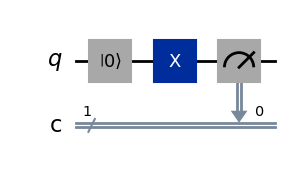

In [106]:
from qiskit.circuit import QuantumCircuit

circ = QuantumCircuit(1,1)
circ.reset(0)
circ.x(0)
circ.measure(0,0)

circ.draw('mpl')

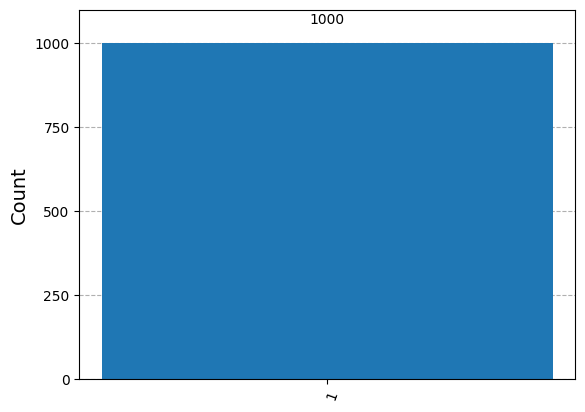

In [107]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# But reality is not that simple...

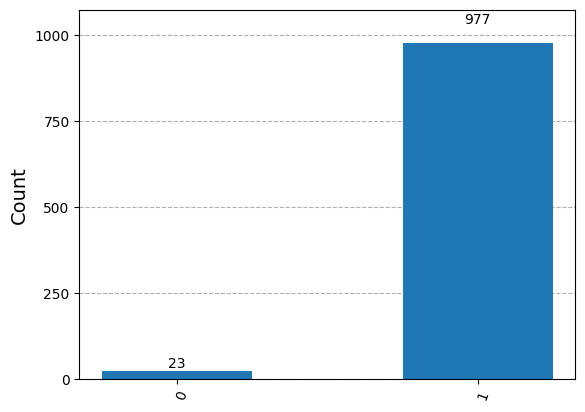

In [108]:
from qiskit_ibm_runtime.fake_provider import FakeFez
backend = FakeFez()

circ = QuantumCircuit(1,1)
circ.reset(0)
circ.x(0)
circ.measure(0,0)

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# And it gets worse with time

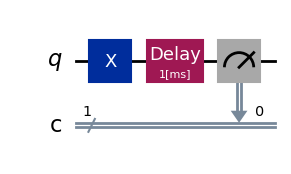

In [109]:
circ = QuantumCircuit(1,1)
circ.x(0)
circ.delay(1, unit='ms')
circ.measure(0,0)

circ.draw('mpl')

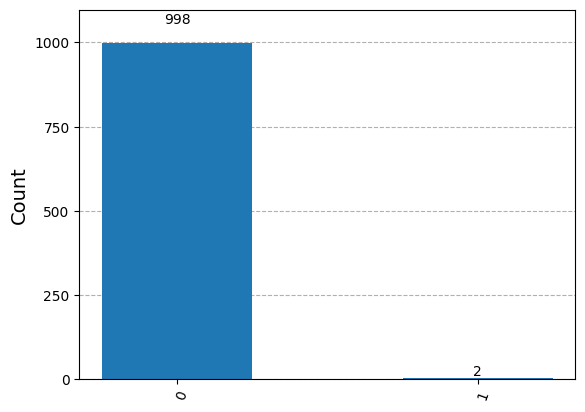

In [110]:
job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Fortunately, we have cat qubits

Label(value='')

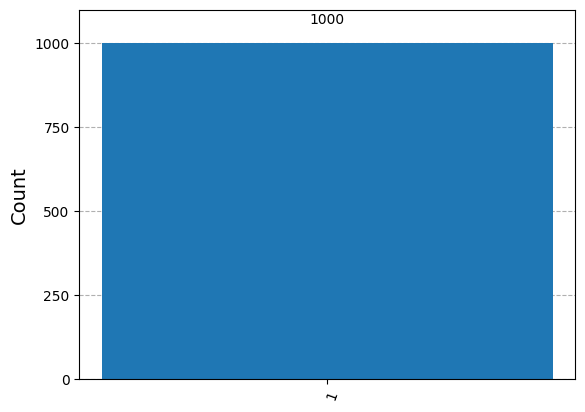

In [111]:
from qiskit_alice_bob_provider import AliceBobRemoteProvider

provider = AliceBobRemoteProvider(api_key=api_key, url='https://api.alice-bob.com/')

backend = provider.get_backend('QPU:1Q:BOSON_4A', average_nb_photons=11.0)

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# If we had time...

We could run https://github.com/Alice-Bob-SW/felis/blob/main/samples/1_hardware_experiments/2%20-%20Boson%204%20tutorial.ipynb and reproduce the figure below

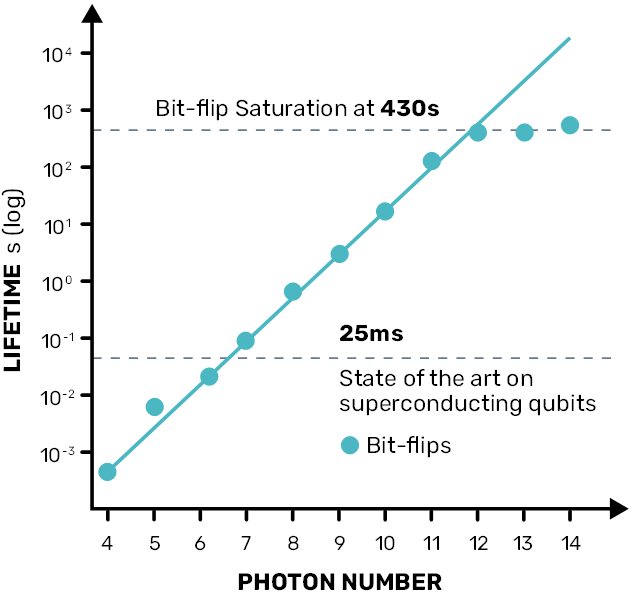

# But this is only in one dimension

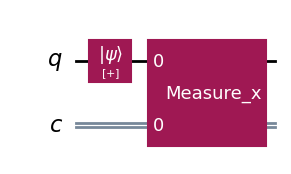

In [112]:
circ = QuantumCircuit(1,1)
circ.initialize('+', 0)
circ.measure_x(0,0)

circ.draw('mpl', cregbundle=False)

Label(value='')

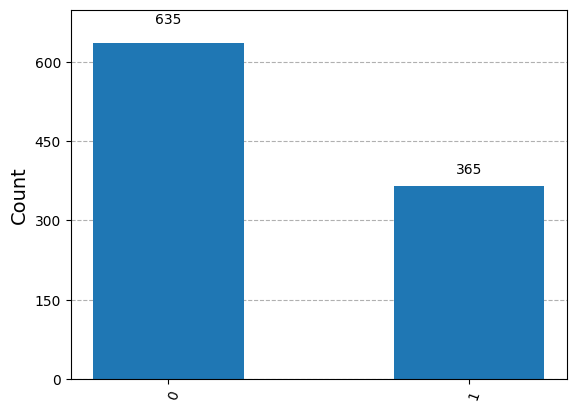

In [113]:
backend = provider.get_backend('QPU:1Q:BOSON_4A', average_nb_photons=4)

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

## Never mind: we'll just fix phase-flips. But first, let's learn to detect bit-flips.

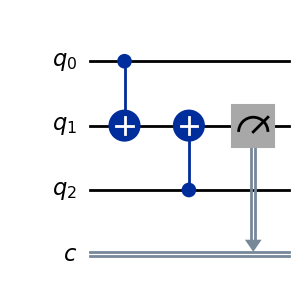

In [114]:
circ = QuantumCircuit(3,1)
circ.cx(0,1)
circ.cx(2,1)
circ.measure(1,0)

circ.draw('mpl', cregbundle=False)

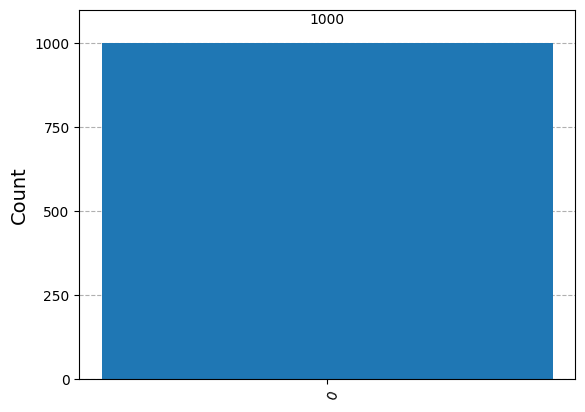

In [115]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

## Now let's introduce an error

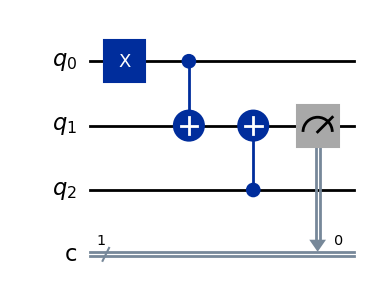

In [116]:
circ = QuantumCircuit(3,1)
circ.x(0)
circ.cx(0,1)
circ.cx(2,1)
circ.measure(1,0)

circ.draw('mpl')

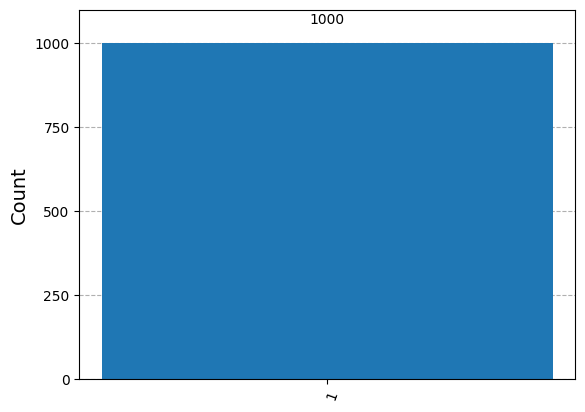

In [117]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

## But where is the error?

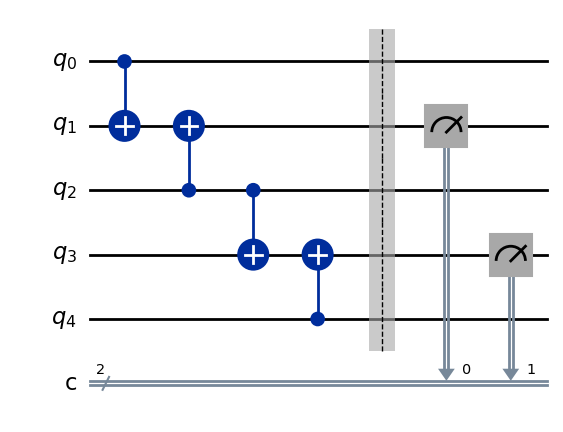

In [118]:
circ = QuantumCircuit(5,2)
circ.cx(0,1)
circ.cx(2,1)
circ.cx(2,3)
circ.cx(4,3)
circ.barrier()
circ.measure(1,0)
circ.measure(3,1)

circ.draw('mpl')

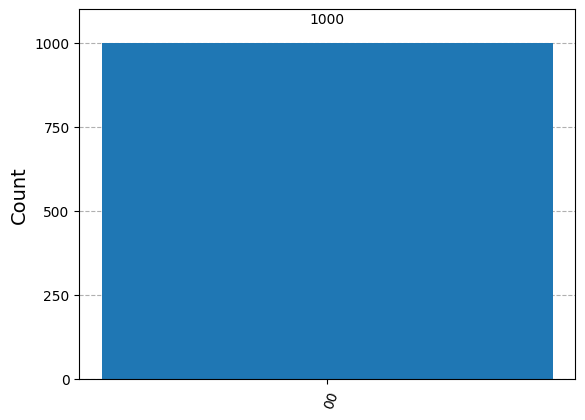

In [119]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

## Let's add an error

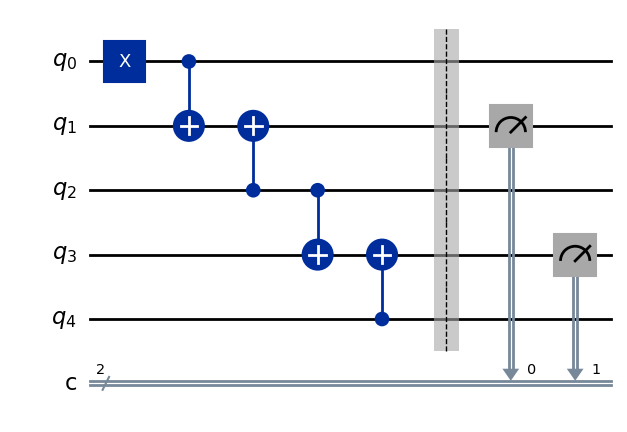

In [120]:
circ = QuantumCircuit(5,2)
circ.x(0)
circ.cx(0,1)
circ.cx(2,1)
circ.cx(2,3)
circ.cx(4,3)
circ.barrier()
circ.measure(1,0)
circ.measure(3,1)

circ.draw('mpl')

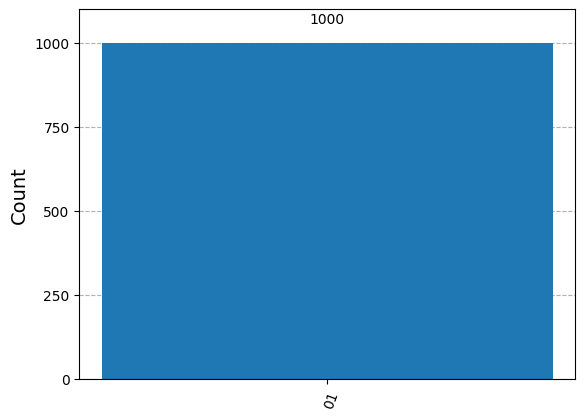

In [121]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Now let's adapt this to phase-flips, starting with error detection

Let us observe that in the computational basis, the target qubit is flipped when the control qubit is equal in state $\lvert 0\rangle$:

$CNOT\lvert 00\rangle = \lvert 00\rangle$

$CNOT\lvert 01\rangle = \lvert 01\rangle$

$CNOT\lvert 10\rangle = \lvert 11\rangle$

$CNOT\lvert 11\rangle = \lvert 10\rangle$

But in the Hadamard basis, the control qubit is flipped when the target qubit is in state $\lvert -\rangle$:

$CNOT\lvert ++\rangle = \lvert ++\rangle$

$CNOT\lvert +-\rangle = \lvert --\rangle$

$CNOT\lvert -+\rangle = \lvert -+\rangle$

$CNOT\lvert --\rangle = \lvert +-\rangle$


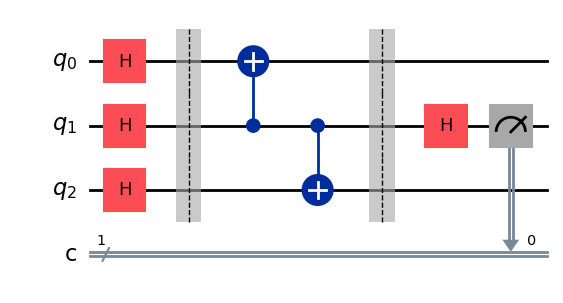

In [122]:
circ = QuantumCircuit(3,1)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
circ.cx(1,0)
circ.cx(1,2)
circ.barrier()
circ.h(1)
circ.measure(1,0)

circ.draw('mpl')

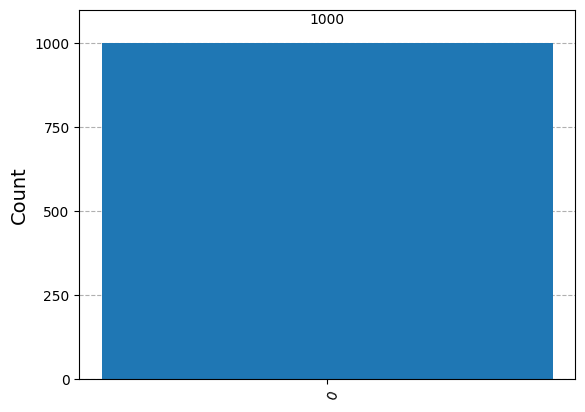

In [123]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Let's add a phase-flip to check

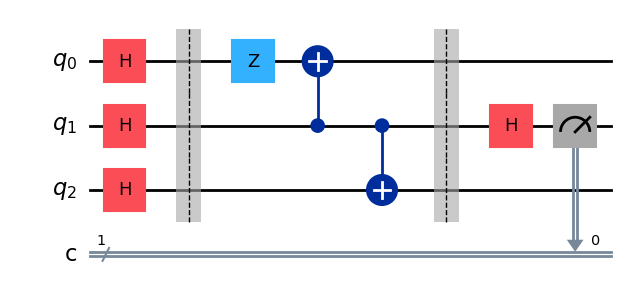

In [124]:
circ = QuantumCircuit(3,1)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
circ.z(0)
circ.cx(1,0)
circ.cx(1,2)
circ.barrier()
circ.h(1)
circ.measure(1,0)

circ.draw('mpl')

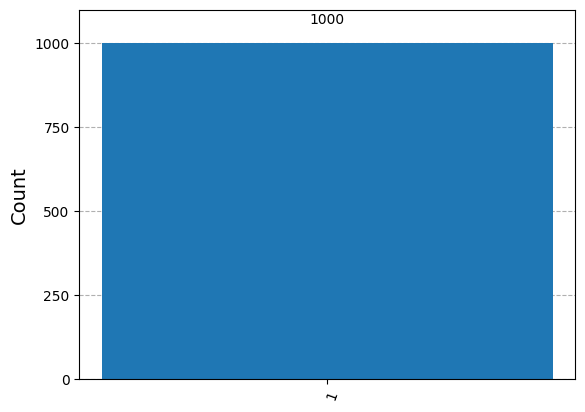

In [125]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Let's create a logical qubit

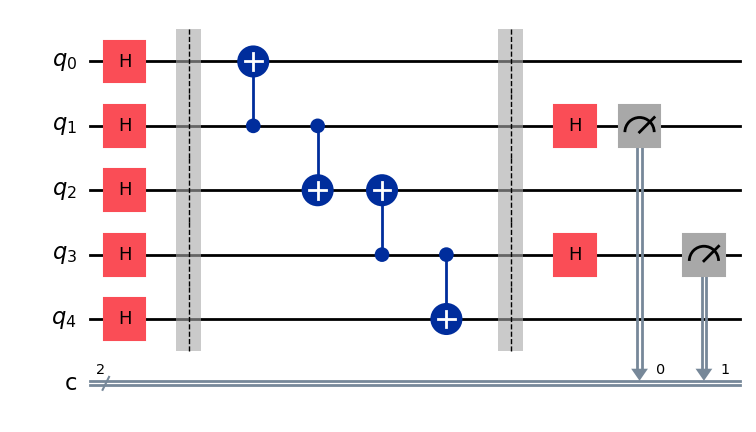

In [126]:
circ = QuantumCircuit(5,2)
for i in range(circ.num_qubits):
  circ.h(i)
circ.barrier()
circ.cx(1,0)
circ.cx(1,2)
circ.cx(3,2)
circ.cx(3,4)
circ.barrier()
circ.h(1)
circ.h(3)
circ.measure(1,0)
circ.measure(3,1)

circ.draw('mpl')

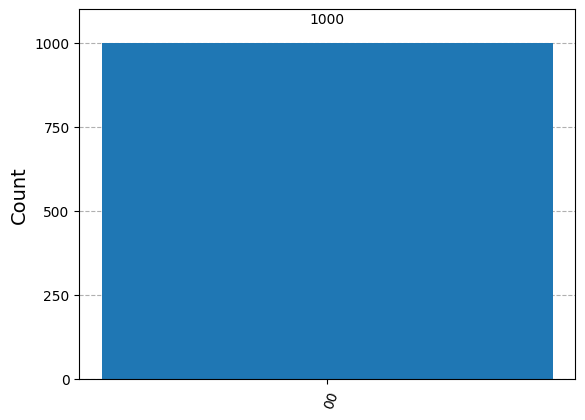

In [127]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Let's make it noisy with Felis

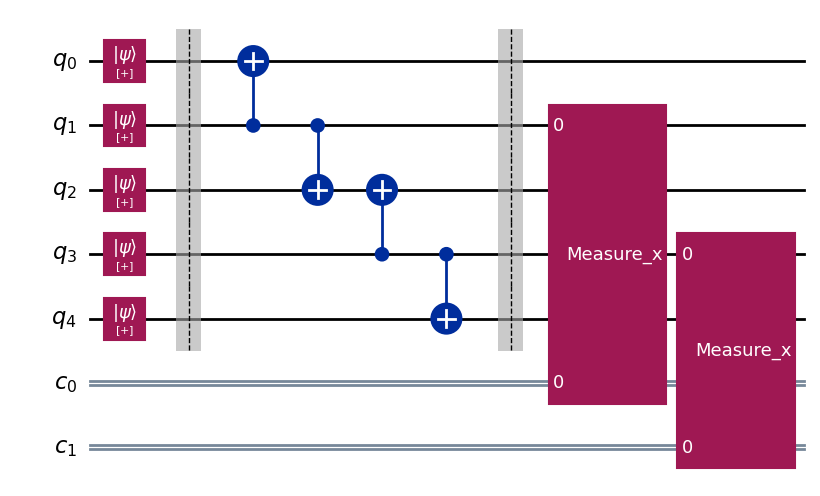

In [128]:
circ = QuantumCircuit(5,2)
for i in range(circ.num_qubits):
  circ.initialize('+', i)
circ.barrier()
circ.cx(1,0)
circ.cx(1,2)
circ.cx(3,2)
circ.cx(3,4)
circ.barrier()
circ.measure_x(1,0)
circ.measure_x(3,1)

circ.draw('mpl', cregbundle=False)

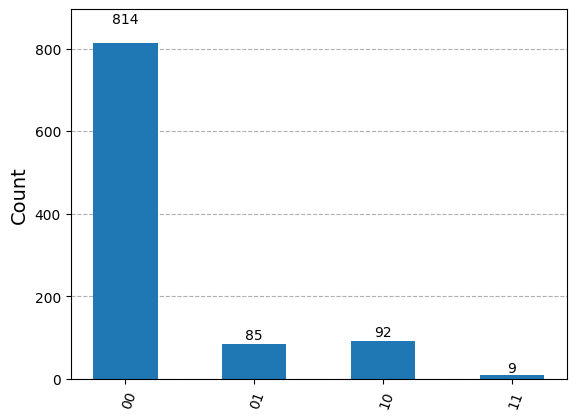

In [129]:
from qiskit_alice_bob_provider import AliceBobLocalProvider
provider = AliceBobLocalProvider()
backend = provider.get_backend('EMU:6Q:PHYSICAL_CATS', average_nb_photons=4, kappa_1=100, kappa_2=100_000)

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Let's apply a logical Z gate

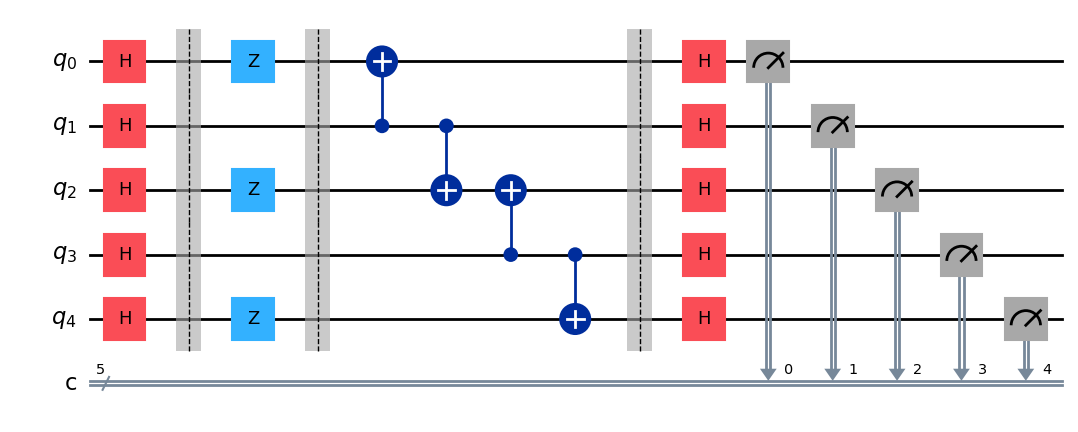

In [130]:
circ = QuantumCircuit(5,5)
for i in range(circ.num_qubits):
  circ.h(i)
circ.barrier()
circ.z(0)
circ.z(2)
circ.z(4)
circ.barrier()
circ.cx(1,0)
circ.cx(1,2)
circ.cx(3,2)
circ.cx(3,4)
circ.barrier()
for i in range(circ.num_qubits):
  circ.h(i)
  circ.measure(i,i)

circ.draw('mpl')

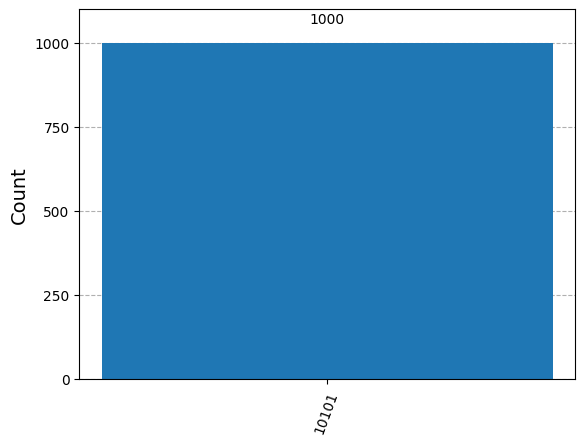

In [131]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# Let's try a T gate...

A T gate is defined by:

$T\lvert 0\rangle = \lvert 0\rangle$

$T\lvert 1\rangle = e^{i\frac{\pi}{4}}\lvert 1\rangle$

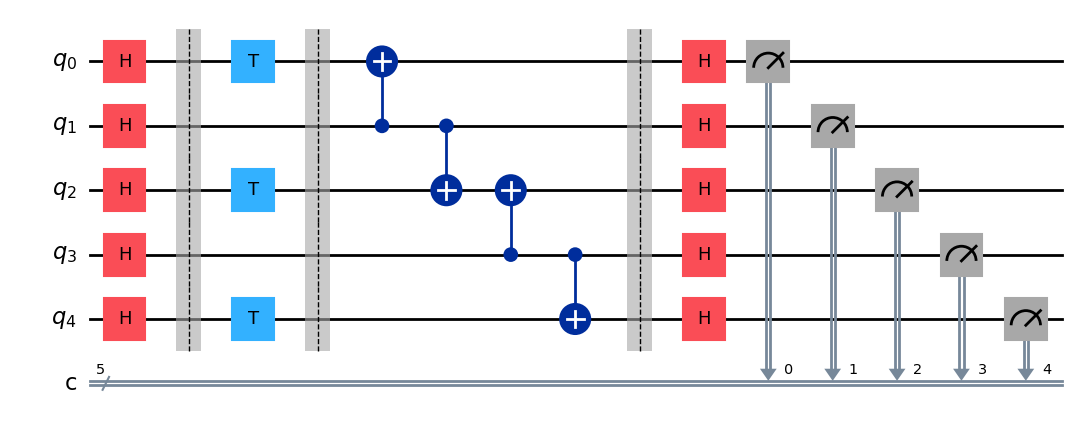

In [132]:
circ = QuantumCircuit(5,5)
for i in range(circ.num_qubits):
  circ.h(i)
circ.barrier()
circ.t(0)
circ.t(2)
circ.t(4)
circ.barrier()
circ.cx(1,0)
circ.cx(1,2)
circ.cx(3,2)
circ.cx(3,4)
circ.barrier()
for i in range(circ.num_qubits):
  circ.h(i)
  circ.measure(i,i)

circ.draw('mpl')

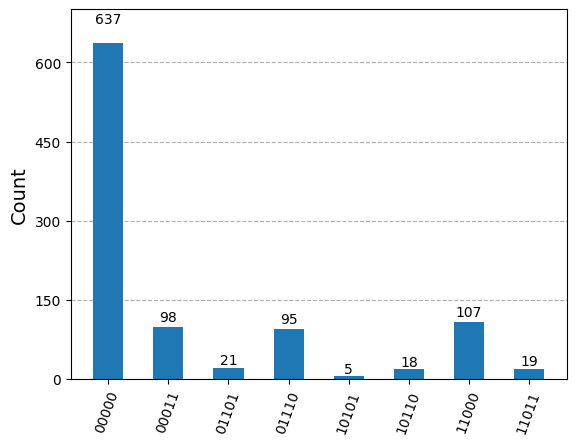

In [133]:
backend = AerSimulator()

job = backend.run(circ, shots=1000)
res = job.result()
counts = res.get_counts()
plot_histogram(counts)

# This is why we need magic state factories...

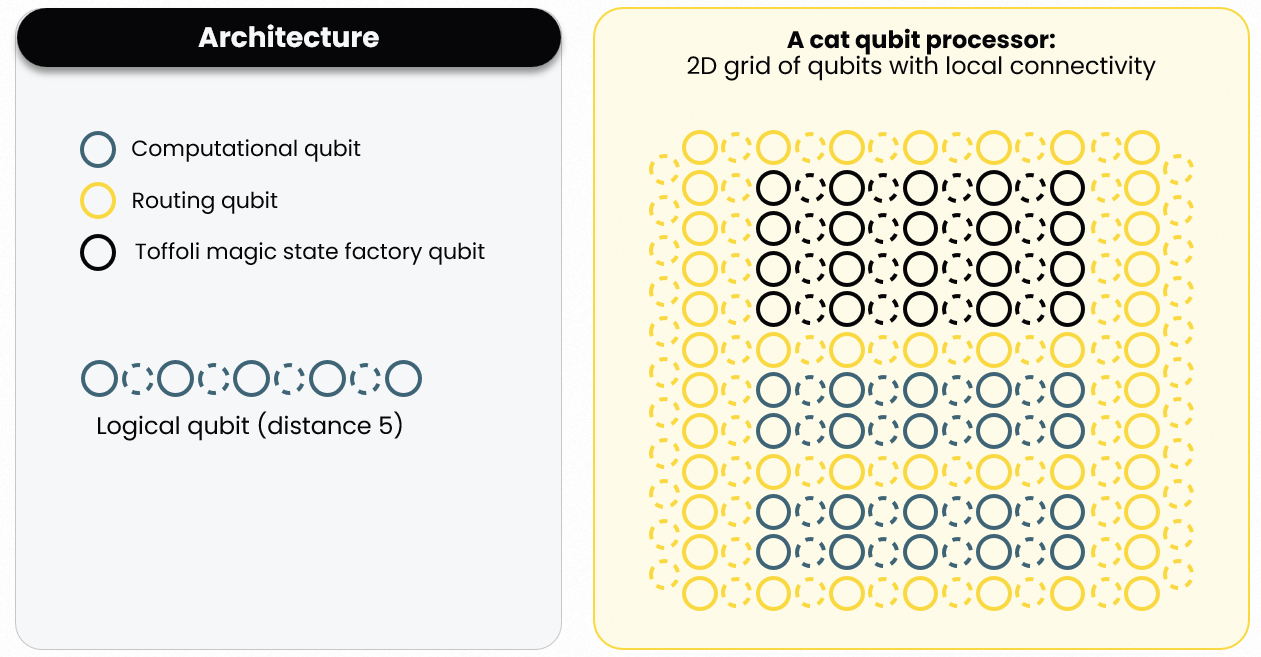